<a href="https://colab.research.google.com/github/thanhdtnguyen/Deep-Learning-with-Keras-Tensorflow/blob/master/computer_vision_fashion_mnist_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion MNIST Dataset

In [1]:
import tensorflow as ft
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist

# fashion mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("accuracy")>=0.98:
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True 

callbacks=myCallback()

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [4]:
model = keras.models.Sequential([layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
                                 layers.MaxPooling2D(2,2),
                                 #layers.Conv2D(64, (3,3), activation="relu"),
                                 #layers.MaxPooling2D(2,2),
                                 layers.Flatten(),
                                 layers.Dense(128, activation="relu"),
                                 layers.Dense(10, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=15, callbacks=callbacks)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3846 - accuracy: 0.8632
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2599 - accuracy: 0.9045
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2134 - accuracy: 0.9213
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1781 - accuracy: 0.9341
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1474 - accuracy: 0.9449
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1260 - accuracy: 0.9527
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1026 - accuracy: 0.9621
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0849 - accuracy: 0.9688
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0700 - accuracy: 0.9740
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.058

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

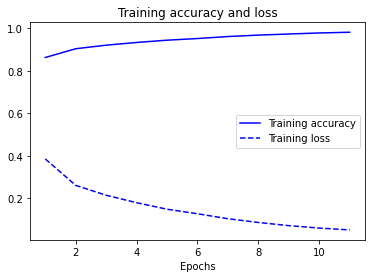

In [8]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "b-", label="Training accuracy")
plt.plot(epochs, loss, "b--", label="Training loss")
plt.title("Training accuracy and loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [9]:
model.summary()
model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.9119


[0.40128523111343384, 0.911899983882904]

In [10]:
prediction = model.predict(test_images)

print(prediction[6])
print(test_labels[6])

[6.1613177e-13 4.6118396e-14 8.5378941e-03 4.0412766e-13 9.9146211e-01
 2.5652516e-13 2.4729145e-09 2.9381271e-20 2.0354737e-15 2.9668308e-16]
4


## Handwritting MNIST dataset

In [19]:
# handwritting mnist

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [20]:
class callback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("accuracy")>=0.98:
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks=callback()

train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model_mnist = keras.models.Sequential([
                                       layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
                                       layers.MaxPooling2D(2,2),
                                       layers.Flatten(),
                                       layers.Dense(128, activation="relu"),
                                       layers.Dense(10, activation="sigmoid")])

model_mnist.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model_mnist.fit(train_images, train_labels, epochs=15, callbacks=callbacks)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1610 - accuracy: 0.9529
Epoch 2/15
1864/1875 [============================>.] - ETA: 0s - loss: 0.0560 - accuracy: 0.9832
Reached 98% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9833


In [21]:
model_mnist.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9850


[0.04663615673780441, 0.9850000143051147]

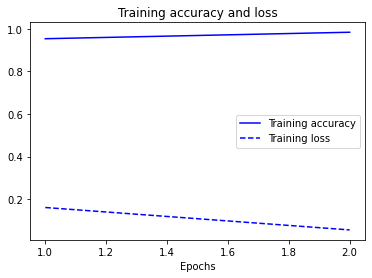

In [22]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "b-", label="Training accuracy")
plt.plot(epochs, loss, "b--", label="Training loss")
plt.title("Training accuracy and loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [24]:
prediction = model_mnist.predict(test_images)
print(prediction[0])
print(test_labels[0])

[8.7991839e-07 1.1997810e-06 6.8275367e-05 2.7496199e-05 8.3028465e-07
 4.8765128e-07 1.4905226e-10 9.1615474e-01 5.9759500e-06 3.2134121e-05]
7
